## Diabetes Dataset

In [1]:
import numpy as np 
import pandas as pd 

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

In [3]:
dia_df = pd.read_csv(r'C:/Users/admin/Downloads/diabetes.csv')
dia_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dia_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
x = dia_df.drop(['Outcome'], axis = 1)
y = dia_df['Outcome']

In [8]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Split Data

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=1, stratify=y)


In [10]:
y_train.value_counts()

0    400
1    214
Name: Outcome, dtype: int64

In [11]:
y_test.value_counts()

0    100
1     54
Name: Outcome, dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

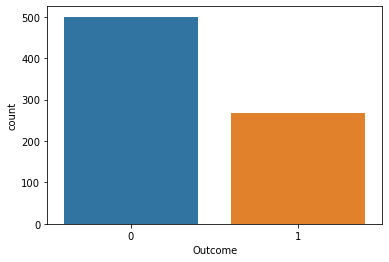

In [13]:
sns.countplot(dia_df['Outcome'])

### Build Decision Tree Model

In [15]:
dt_model = DecisionTreeClassifier(criterion='gini')
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
y_pred_test = dt_model.predict(x_test)

### Testing accuracy

In [22]:
testing_accuracy = accuracy_score(y_test, y_pred_test)
print('Testing accuracy is:', testing_accuracy)
print()
clf_report = classification_report(y_test, y_pred_test)
print('Classification report for testing accuracy is:', clf_report)
print()
confusion_matrix(y_test, y_pred_test)

Testing accuracy is: 0.6818181818181818

Classification report for testing accuracy is:               precision    recall  f1-score   support

           0       0.76      0.75      0.75       100
           1       0.55      0.56      0.55        54

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154




array([[75, 25],
       [24, 30]], dtype=int64)

### Training Accuracy

In [23]:
y_pred_train = dt_model.predict(x_train)

In [24]:
training_accuracy = accuracy_score(y_train, y_pred_train)
print('Training accuracy is:', training_accuracy)
print()
clf_report = classification_report(y_train, y_pred_train)
print('Classification report for training accuracy is:', clf_report)
print()
confusion_matrix(y_train, y_pred_train)

Training accuracy is: 1.0

Classification report for training accuracy is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614




array([[400,   0],
       [  0, 214]], dtype=int64)

In [26]:
plt.figure(figsize= (200,100))
tree = plot_tree(decision_tree=dt_model, feature_names=dia_df.columns, class_names=['0', '1'], filled= True)

plt.savefig('DT.png')

### Hyperparameter tuning

### GridSearchCV

In [28]:
hyperparameters = {'criterion':['gini', 'entropy'],
                  'max_depth': np.arange(2,10),
                  'min_samples_split': np.arange(2,21),
                  'min_samples_leaf' : np.arange(1,15)}

dt_model = DecisionTreeClassifier()

gscv_dt_model = GridSearchCV(dt_model, hyperparameters, cv = 5)
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])})

In [29]:
gscv_dt_model.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 13}

In [33]:
best_model = DecisionTreeClassifier(criterion = 'gini',
                                    max_depth = 7,
                                    min_samples_leaf = 6,
                                    min_samples_split = 13)
best_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=13)

### Testing Accuracy

In [34]:
y_pred_test = best_model.predict(x_test)

In [35]:
testing_accuracy = accuracy_score(y_test, y_pred_test)
print('Testing accuracy is:', testing_accuracy)
print()
clf_report = classification_report(y_test, y_pred_test)
print('Classification report for testing accuracy is:', clf_report)
print()
confusion_matrix(y_test, y_pred_test)

Testing accuracy is: 0.7467532467532467

Classification report for testing accuracy is:               precision    recall  f1-score   support

           0       0.77      0.86      0.82       100
           1       0.67      0.54      0.60        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154




array([[86, 14],
       [25, 29]], dtype=int64)

### Training Accuracy

In [36]:
y_pred_train = best_model.predict(x_train)

In [37]:
training_accuracy = accuracy_score(y_train, y_pred_train)
print('Training accuracy is:', training_accuracy)
print()
clf_report = classification_report(y_train, y_pred_train)
print('Classification report for training accuracy is:', clf_report)
print()
confusion_matrix(y_train, y_pred_train)

Training accuracy is: 0.8534201954397395

Classification report for training accuracy is:               precision    recall  f1-score   support

           0       0.87      0.91      0.89       400
           1       0.82      0.75      0.78       214

    accuracy                           0.85       614
   macro avg       0.84      0.83      0.84       614
weighted avg       0.85      0.85      0.85       614




array([[364,  36],
       [ 54, 160]], dtype=int64)

### RandomizedSearchCV

In [38]:
hyperparameters = {'criterion':['gini', 'entropy'],
                  'max_depth': np.arange(2,10),
                  'min_samples_split': np.arange(2,21),
                  'min_samples_leaf' : np.arange(1,15)}

dt_model = DecisionTreeClassifier()

rscv_dt_model = RandomizedSearchCV(dt_model, hyperparameters, cv = 5)
rscv_dt_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])})

In [39]:
rscv_dt_model.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 13,
 'max_depth': 2,
 'criterion': 'gini'}

In [40]:
best_model = DecisionTreeClassifier(criterion = 'gini',
                                    max_depth = 2,
                                    min_samples_leaf = 13,
                                    min_samples_split = 8)
best_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=13, min_samples_split=8)

### Testing Accuracy

In [41]:
y_pred_test = best_model.predict(x_test)

In [42]:
testing_accuracy = accuracy_score(y_test, y_pred_test)
print('Testing accuracy is:', testing_accuracy)
print()
clf_report = classification_report(y_test, y_pred_test)
print('Classification report for testing accuracy is:', clf_report)
print()
confusion_matrix(y_test, y_pred_test)

Testing accuracy is: 0.7532467532467533

Classification report for testing accuracy is:               precision    recall  f1-score   support

           0       0.77      0.89      0.82       100
           1       0.71      0.50      0.59        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154




array([[89, 11],
       [27, 27]], dtype=int64)

### Training Accuracy

In [43]:
y_pred_train = best_model.predict(x_train)

In [44]:
training_accuracy = accuracy_score(y_train, y_pred_train)
print('Training accuracy is:', training_accuracy)
print()
clf_report = classification_report(y_train, y_pred_train)
print('Classification report for training accuracy is:', clf_report)
print()
confusion_matrix(y_train, y_pred_train)

Training accuracy is: 0.7768729641693811

Classification report for training accuracy is:               precision    recall  f1-score   support

           0       0.80      0.89      0.84       400
           1       0.73      0.57      0.64       214

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614




array([[354,  46],
       [ 91, 123]], dtype=int64)

### Ploting decision tree best model

In [45]:
plt.figure(figsize=(200,100))
tree = plot_tree(decision_tree= best_model, feature_names= dia_df.columns, class_names=['0','1'], filled=True)

plt.savefig('DT_GSCV_Hyperparameter.png')

### Pruning

In [46]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.0)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
values = dt_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas = values['ccp_alphas']
ccp_alphas

array([0.        , 0.00135722, 0.00142508, 0.0014477 , 0.0014477 ,
       0.0014806 , 0.00149294, 0.00154723, 0.00157438, 0.00160409,
       0.00161474, 0.00175434, 0.00193027, 0.00217155, 0.00217155,
       0.00226203, 0.00230205, 0.00231632, 0.00238505, 0.00243823,
       0.002443  , 0.002443  , 0.002443  , 0.00252652, 0.00260586,
       0.00260586, 0.0026152 , 0.00263506, 0.00267249, 0.0027115 ,
       0.00281315, 0.00283775, 0.00284001, 0.00285016, 0.0029316 ,
       0.0029316 , 0.0029316 , 0.00300677, 0.00315862, 0.00327295,
       0.00339305, 0.00346049, 0.0037484 , 0.00384586, 0.00391397,
       0.00427404, 0.00428243, 0.00463828, 0.00481021, 0.00500358,
       0.00500745, 0.00661636, 0.00778397, 0.00821741, 0.01140636,
       0.01858956, 0.02517158, 0.0871409 ])

In [48]:
train_accuracy = []
testing_accuracy = []

for ccp_alpha in ccp_alphas:
    dt_model = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=10)
    dt_model.fit(x_train,y_train)
    train_accuracy.append(dt_model.score(x_train,y_train))
    testing_accuracy.append(dt_model.score(x_test,y_test))

In [49]:
max(testing_accuracy)

0.7662337662337663

In [53]:
testing_accuracy.index(max(testing_accuracy))

46

In [54]:
train_accuracy[46]

0.8469055374592834

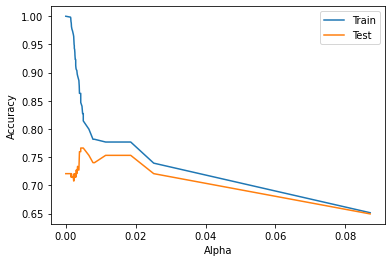

In [55]:
fig,ax = plt.subplots()
ax.plot(ccp_alphas,train_accuracy,label = 'Train')
ax.plot(ccp_alphas,testing_accuracy,label = 'Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.legend()